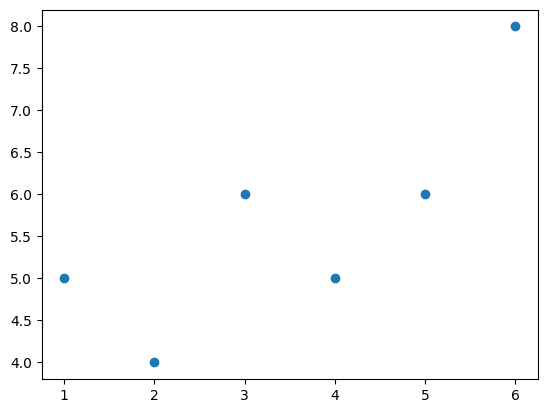

In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

#data
xs = np.array([1,2,3,4,5,6], dtype=np.float64) 
ys = np.array([5,4,6,5,6,8], dtype=np.float64)

plt.scatter(xs, ys)
plt.show()

Based on given data, we want to find a linear function that fits this data in the "best possible way" (to be more precise where the squarred error is at an minimum). With this function we can then also make predictions.
The function has the form y = m*x+b. Our task is to find what the best m (=slope) and b (=bias) is to model our data. 
m and b are given by:

$$m=\frac{\overline{x}\cdot\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}} \qquad b=\overline{y}-m\overline{x}$$

Where the overbar denotes the mean i.e $\overline x = \frac{\sum x_i}{n}$. 

In [2]:
m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)**2) - mean(xs**2)))
print("m: ", m)

b = mean(ys) - m * mean(xs)
print("b: ", b)


m:  0.5714285714285707
b:  3.6666666666666696


In [3]:

# we want to see how well we are doing so we calculate R-squared (a statistical measauremnt for regression models)
# R-squared ranges from 0 to 1 where the higher the value, the better the model is
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

regression_line = [m*x + b for x in xs]
y_mean_line = [mean(ys) for y in ys]

squared_error_regr = squared_error(ys, regression_line)
squared_error_y_mean = squared_error(ys, y_mean_line)
    
r_squared = 1 - (squared_error_regr/squared_error_y_mean)
print("r_squared", r_squared)

r_squared 0.6122448979591837


In [6]:
# we now want to use our model to predict the next point given an input of 8
predict_x = 8
predict_y = m*predict_x + b
print(predict_y)

8.238095238095235


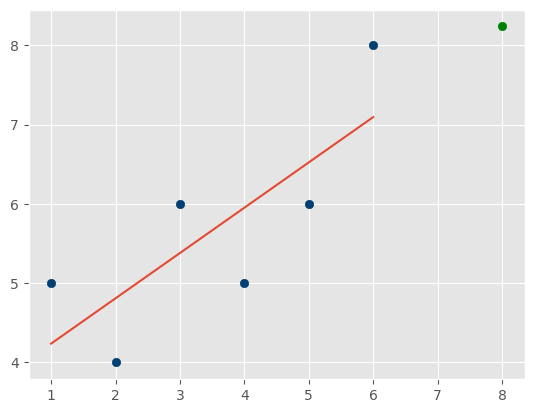

In [7]:
# plotting
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.scatter(predict_x, predict_y, color = "g")
plt.plot(xs, regression_line)
plt.show()